# 2ª Parte do Projeto da Disciplina Data Mining no Mestrado em Ciencias de Dados- ESTG-IPL.

### Este notebook se refere ao Objetivo do Data Mining relativo a verificar existência ou não de padrão da Nota Total em função da Origem Escolar do candidato, se oriundo de Escola Publica ou Particular

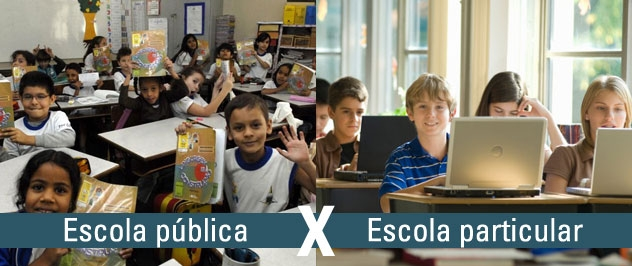

#### Mencionamos mais uma vez que optamos por realizar a Análise dos Objetivos em Notebooks separados por entendermos que ficará mais simples sua verificação pedagógica/acadêmica e também para melhor desempenho computacional em função da dimensionalidade do dataset ENEM_2019.

## Instalando bibliotecas iniciais

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Seção I

## Preparação do dados

#### A coleta desses dados foi executada através de download diretamente do site https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem, para computador num ficheiro zipado contento incluindo o ficheiro com o Dicionário dos dados.

### OBS IMPORTANTE: 

#### Ao tentarmos construir um Modelo usando o RandomForestClassifier com a totalidade do dataset, mesmos após as reduções efetuadas, o software não está tendo desempenho computacional, informando o erro a seguir:


# MemoryError: Unable to allocate 6.83 GiB for an array with shape (255858, 3585) and data type float64

## Visando evitar o problema acima mencionado, e para fins de atendimento didáticos/acadêmicos reduzimos o dataset para ser possível efetuar o procedimento de deploy solicitado no Enunciado do Projeto da Unidade Curricular.

## Efetuando o carregamento do ficheiro e leitura dos dados para as primeiras 150000 linhas

In [2]:
df = pd.read_csv(r'C:\Users\probe\Downloads\MICRODADOS_ENEM_2019.csv', encoding='ISO-8859-1', nrows = 150000, sep=';')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


## Seleção dos dados em função do Objetivo: verificar existência ou não de padrão da Nota Total em função da Origem Escolar do candidato, se oriundo de Escola Publica ou Particular

In [3]:
### Verificação da dimensionalidade do dataset
df.shape

(150000, 136)

In [4]:
# Obtendo os nomes das colunas
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

### Após clarificado o Objetivo a ser alcançado e do conhecimento da dimensionalidade, podemos selecionar as features mais relevantes para serem usadas em  nosso Modelo

### Análise Exploratória e Limpeza dos Dados

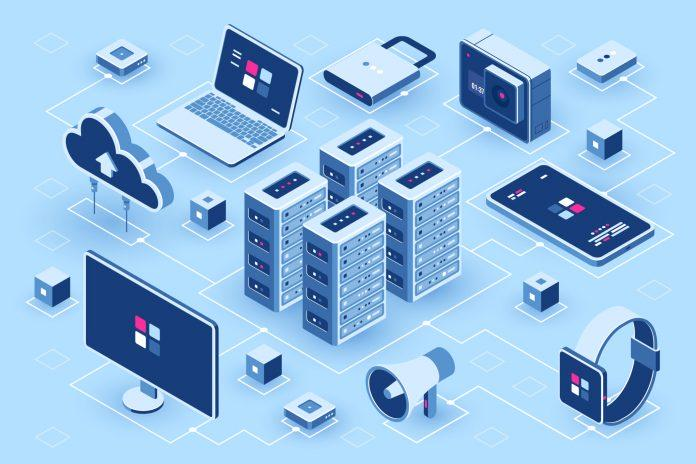

#### Criando um subset dos dados 

In [5]:
# seleção das colunas especificas para o Objetivo planeado
colunas = ['TP_ESCOLA','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT','NU_NOTA_REDACAO']

In [6]:
# filtrando do dataset original as colunas selecionadas
subset_notas = df.filter(items=colunas)

In [7]:
subset_notas.tail(10)

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
149990,2,455.2,424.6,552.9,557.6,640.0
149991,2,NaN,NaN,NaN,NaN,NaN
149992,3,680.6,668.2,624.1,837.3,860.0
149993,2,394.9,578.7,563.9,429.5,580.0
149994,1,394.3,490.2,501.7,586.7,600.0
149995,1,468.3,423.5,499.6,397.2,680.0
149996,1,415.8,367.8,457.0,449.2,240.0
149997,1,594.9,622.2,551.8,558.7,680.0
149998,1,NaN,NaN,NaN,NaN,NaN
149999,1,443.2,385.9,518.2,580.0,520.0


### Como nos notebooks 1 e 2, também nesse, atribuímos importância de consultar o Dicionário de Dados para obter detalhes da feature 'TP_ESCOLA

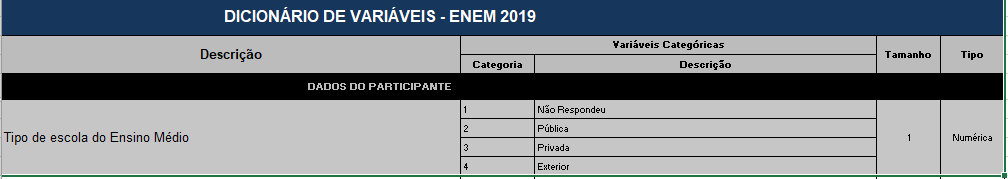

In [8]:
# obtendo as estatisticas das Notas
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO'] 

round(subset_notas[notas].describe()).T

,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CN,111131.0,481.0,76.0,0.0,422.0,475.0,536.0,832.0
NU_NOTA_CH,116871.0,516.0,80.0,0.0,460.0,521.0,573.0,798.0
NU_NOTA_MT,111131.0,523.0,109.0,0.0,436.0,502.0,597.0,985.0
NU_NOTA_LC,116871.0,527.0,61.0,0.0,492.0,532.0,569.0,750.0
NU_NOTA_REDACAO,116871.0,600.0,184.0,0.0,520.0,600.0,700.0,1000.0


NU_NOTA_CN ==> Nota da prova de Ciências da Natureza

NU_NOTA_CH ==> Nota da prova de Ciências Humanas

NU_NOTA_MT ==> Nota da prova de Matemática

NU_NOTA_LC ==> Nota da prova de Linguagens e Códigos

NU_NOTA_REDACAO ==> Nota da prova de Redação

### Para atender o Objetivo do DM, precisamos filtrar somente os valores 2 e 3 da coluna TP_ESCOLA 

In [9]:
subset4 = subset_notas.loc[subset_notas['TP_ESCOLA'].isin([2, 3])]
Escola_Publica = subset_notas.loc[subset_notas['TP_ESCOLA']==2, 'TP_ESCOLA']
Escola_Privada = subset_notas.loc[subset_notas['TP_ESCOLA']==3, 'TP_ESCOLA'] 

In [10]:
# verificando dimensionalidade do novo conjunto de dados 
subset4.shape

(39360, 6)

# Seção II

## Qualidade dos dados

### Verificando os tipos de dados por feature e se há valores omissos/nulos

In [11]:
subset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39360 entries, 9 to 149993
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP_ESCOLA        39360 non-null  int64  
 1   NU_NOTA_CN       34191 non-null  float64
 2   NU_NOTA_CH       35601 non-null  float64
 3   NU_NOTA_LC       35601 non-null  float64
 4   NU_NOTA_MT       34191 non-null  float64
 5   NU_NOTA_REDACAO  35601 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 2.1 MB


In [12]:
# obtendo a totalização das notas
subset4[notas].sum()

NU_NOTA_CN         16310115.8
NU_NOTA_CH         18208558.9
NU_NOTA_MT         17975506.6
NU_NOTA_LC         18669598.3
NU_NOTA_REDACAO    21415360.0
dtype: float64

In [13]:
subset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39360 entries, 9 to 149993
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP_ESCOLA        39360 non-null  int64  
 1   NU_NOTA_CN       34191 non-null  float64
 2   NU_NOTA_CH       35601 non-null  float64
 3   NU_NOTA_LC       35601 non-null  float64
 4   NU_NOTA_MT       34191 non-null  float64
 5   NU_NOTA_REDACAO  35601 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 2.1 MB


In [14]:
# preparando a 'estrutura' do dataframe
subset4[notas].sum(axis=1)

9         2475.2
14           0.0
26        3612.9
28        2387.2
31        2493.8
           ...  
149989    2474.8
149990    2630.3
149991       0.0
149992    3670.2
149993    2547.0
Length: 39360, dtype: float64

In [15]:
# criando coluna/feature 'NU_NOTA_TOTAL'
subset4['NU_NOTA_TOTAL'] = subset4[notas].sum(axis=1)
subset4.sample(8)

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL
112893,2,430.4,521.4,481.3,573.7,560.0,2566.8
134361,2,436.4,509.8,498.9,436.2,400.0,2281.3
137615,2,590.6,600.7,572.4,719.9,840.0,3323.6
61454,2,416.6,553.2,549.2,545.1,560.0,2624.1
128041,2,521.6,592.9,571.5,706.2,620.0,3012.2
138652,2,350.3,435.6,485.1,451.9,640.0,2362.9
76986,2,405.7,379.4,467.6,393.2,500.0,2145.9
23957,2,536.0,485.2,552.2,549.7,720.0,2843.1


#### Verificando a existência de valores omissos que precisam ser tratados antes da implementação da modelização.

In [16]:
subset4.isnull().sum()

TP_ESCOLA             0
NU_NOTA_CN         5169
NU_NOTA_CH         3759
NU_NOTA_LC         3759
NU_NOTA_MT         5169
NU_NOTA_REDACAO    3759
NU_NOTA_TOTAL         0
dtype: int64

Como vimos acima, há muitos dados faltantes nas Notas das Provas, que podem ter sido causados por ausência à Prova. Esses dados serão substituídos pela Mediana da Variável em análise

In [17]:
subset4.loc[(df['NU_NOTA_CN'].isnull() == True), 'NU_NOTA_CN'] = df['NU_NOTA_CN'].median()

In [18]:
subset4.loc[(df['NU_NOTA_CH'].isnull() == True), 'NU_NOTA_CH'] = df['NU_NOTA_CH'].median()

In [19]:
subset4.loc[(df['NU_NOTA_LC'].isnull() == True), 'NU_NOTA_LC'] = df['NU_NOTA_LC'].median()

In [20]:
subset4.loc[(df['NU_NOTA_MT'].isnull() == True), 'NU_NOTA_MT'] = df['NU_NOTA_MT'].median()

In [21]:
subset4.loc[(df['NU_NOTA_REDACAO'].isnull() == True), 'NU_NOTA_REDACAO'] = df['NU_NOTA_REDACAO'].median()

#### Verificando o procedimento de substituiçao

In [22]:
subset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39360 entries, 9 to 149993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP_ESCOLA        39360 non-null  int64  
 1   NU_NOTA_CN       39360 non-null  float64
 2   NU_NOTA_CH       39360 non-null  float64
 3   NU_NOTA_LC       39360 non-null  float64
 4   NU_NOTA_MT       39360 non-null  float64
 5   NU_NOTA_REDACAO  39360 non-null  float64
 6   NU_NOTA_TOTAL    39360 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.4 MB


#### Criando um novo dataframe(subset) sem as notas zero, pois uma nota zero implica ausência em prova e esse  ruído pode distorcer o objetivo do DM.

In [23]:
# Criando um dataframe (subset) sem as notas zero
subset4 = subset4.query("NU_NOTA_TOTAL != 0")
subset4.head(8)

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL
9,2,543.9,548.1,502.5,480.7,400.0,2475.2
26,3,618.2,744.7,636.3,713.7,900.0,3612.9
28,2,430.4,466.8,515.9,394.1,580.0,2387.2
31,2,371.8,501.4,518.6,442.0,660.0,2493.8
34,2,567.3,584.1,595.8,704.5,620.0,3071.7
36,2,475.0,457.9,500.1,501.6,560.0,1518.0
53,2,373.2,409.6,469.5,379.1,480.0,2111.4
55,2,385.8,436.3,393.8,370.0,260.0,1845.9


In [24]:
# verificando o procedimento anterior
round((subset4)['NU_NOTA_TOTAL'].describe()).T

count    35633.0
mean      2598.0
std        486.0
min        300.0
25%       2326.0
50%       2594.0
75%       2912.0
max       4103.0
Name: NU_NOTA_TOTAL, dtype: float64

### Vamos agrupar a Nota Total por Tipo de Escola( 2=Escola Pública e 3=Escola Particular)

In [25]:
round(subset4[['TP_ESCOLA', 'NU_NOTA_TOTAL']].groupby('TP_ESCOLA').describe(),0)

NU_NOTA_TOTAL                                                      
                  count    mean    std    min     25%     50%     75%     max
TP_ESCOLA                                                                    
2               31911.0  2543.0  462.0  300.0  2298.0  2552.0  2836.0  4039.0
3                3722.0  3074.0  428.0  965.0  2819.0  3122.0  3382.0  4103.0

### Ao visualizarmos a distribuição de frequencia entre os grupos dos Candidatos, fica claro que 83.53% dos candidatos tem origem em Escola Pública, e isso gera um dataset desbalanceado.

### O desbalanceamento precisará ser resolvido para não termos resultados enviasados

# Seção III

## Modelização

 ## Ojetivo do DM – Verificar existência ou não de padrão da Nota Total em função da Origem Escolar do candidato, se oriundo de Escola Publica ou Particular

In [26]:
subset4.head()

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL
9,2,543.9,548.1,502.5,480.7,400.0,2475.2
26,3,618.2,744.7,636.3,713.7,900.0,3612.9
28,2,430.4,466.8,515.9,394.1,580.0,2387.2
31,2,371.8,501.4,518.6,442.0,660.0,2493.8
34,2,567.3,584.1,595.8,704.5,620.0,3071.7


In [27]:
# Dimensionalidade do subset
subset4.shape

(35633, 7)

In [28]:
subset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35633 entries, 9 to 149993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP_ESCOLA        35633 non-null  int64  
 1   NU_NOTA_CN       35633 non-null  float64
 2   NU_NOTA_CH       35633 non-null  float64
 3   NU_NOTA_LC       35633 non-null  float64
 4   NU_NOTA_MT       35633 non-null  float64
 5   NU_NOTA_REDACAO  35633 non-null  float64
 6   NU_NOTA_TOTAL    35633 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.2 MB


#### Vamos converter a feature 'NU_NOTA_TOTAL' (nossa variável dependente) para int64 a fim de evitar conflitos quando do treinamento do Modelo

In [29]:
import numpy as np

In [30]:
subset4 = subset4.apply(np.int64)

In [31]:
subset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35633 entries, 9 to 149993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   TP_ESCOLA        35633 non-null  int64
 1   NU_NOTA_CN       35633 non-null  int64
 2   NU_NOTA_CH       35633 non-null  int64
 3   NU_NOTA_LC       35633 non-null  int64
 4   NU_NOTA_MT       35633 non-null  int64
 5   NU_NOTA_REDACAO  35633 non-null  int64
 6   NU_NOTA_TOTAL    35633 non-null  int64
dtypes: int64(7)
memory usage: 2.2 MB


In [32]:
# Verificação do desbalanceamento do dataframe
subset4['TP_ESCOLA'].value_counts()

2    31911
3     3722
Name: TP_ESCOLA, dtype: int64

#  Construção do Modelo

### Instalando as bibliotecas

In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler  # buscar eliminação do desbalanceamento
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

### Divisão dados em treino e teste

In [34]:
X = subset4.drop('NU_NOTA_TOTAL',axis=1)
y = subset4['NU_NOTA_TOTAL']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

### Treinando o Modelo

In [36]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train,y_train)
rf = RandomForestClassifier(max_depth=2)
rf.fit(X_over,y_over)

RandomForestClassifier(max_depth=2)

In [37]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.0032271643047565596


### Instalando bibliotecas para procedimentos de deploy

In [38]:
import joblib
joblib.dump(rf, 'fhs_rf_model.pkl')

['fhs_rf_model.pkl']

In [39]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


### OBS IMPORTANTE: 

#### Ao tentarmos construir um Modelo usando o RandomForestClassifier com a totalidade do dataset, mesmos após as reduções efetuadas, o software não está tendo desempenho computacional, informando o erro a seguir:

# MemoryError: Unable to allocate 6.83 GiB for an array with shape (255858, 3585) and data type float64

## Visando evitar o problema acima mencionado, e para fins de atendimento pedagógicos/acadêmicos reduzimos o dataset para ser possível efetuar o procedimento de deploy solicitado no Enunciado do Projeto da Unidade Curricular.